In [ ]:
#Set up notebook if awkward array not isntalled
#!pip install awkward
import awkward as ak

# Awkward Array quickstart
From the awkward array documentation found [here](https://awkward-array.org/doc/main/), "Awkward Array is a library for nested, variable-sized data, including arbitrary-length lists, records, mixed types, and missing data, using NumPy-like idioms." Awkward array's API makes columnar analysis straightforward to implement in Python. Columnar analysis is advantageous to row-wise analysis as it drastically reduces run time by utilizing memory more effectively and reducing the total number of computer instructions. In this section, we will discuss building awkward arrays and some simple operations. 

## Creating an Awkward Array
First `import awkward` and create a simple jagged array.

In [ ]:
import awkward as ak

In [ ]:
array = ak.Array([[5,4,4],[2],[3,5]])
array

Awkward array entries can be read the same way as a python list or numpy array with indexing. Lets read the 3rd row's 2nd entry as an example.

In [ ]:
print(array[2,1])

# Matrix Manipulations



## Array Arithmetic
Let's perform some simple manipulations with this array. It is possible to add arrays, multiple arrays element wise, and multiply arrays by a scalar. Check that the below result makes sense with pen and paper.

In [ ]:
array*array+5*array

The line "type: 3 * var * int64" is read as follows. The array has 3 entries of variable (var) length, where the entries are of datatype int64. Take a look at the two examples below, can you understand the output?

In [ ]:
array1 = ak.Array([1.,2.,3.])
array1

In [ ]:
array2 = ak.Array([[2,3.2],[[2,3],[5,6], [10,10]]])
array2

## Products and Sums

Suppose we want to multiply the values in a row together. In awkward array this is accomplished by calling `ak.prod()` and defining which axis to multiply along. `axis=1` corresponds to multiplying the elements of each inner array.

In [ ]:
row_product = ak.prod(array, axis=1)
print("Row Product: \t", row_product, " Row Product dimension: \t", row_product.ndim)
column_product = ak.prod(array, axis = 0)
print("Column Product: ", column_product, " Column Product dimension: ", column_product.ndim)


If you instead set `axis=0`, it will multiply the elements along the columns of this array. This operation has reduced the dimension of the array from 2 to 1, hence this operation is a 'reducer'. It is neccesarry to keep in mind that for certain operations between awkward arrays to work, they must be of the same dimension. If instead `ak.prod` returned:


In [ ]:
ak.Array([[80],[2],[15]])

We may need to reduce the resulting array dimension somehow for the analysis.
                                        
We can similarly sum along a given axis by calling `ak.sum()`.

In [ ]:
row_sum = ak.sum(array, axis=1)
row_sum

## Boolean Operations
Boolean operations can be performed on awkward arrays element-wise. This is often done when evaluating selection criteria. Let's obtain an array of booleans containing the information of which entries are $> 3$.

In [ ]:
selection = array > 3
print(selection)

With `selection`, we can obtain information about which rows contain at least one entry satisfying the criterion by calling `ak.any()`.

In [ ]:
good_row = ak.any(selection, axis = 1)
print(good_row)

`ak.any()` is analogous to an OR operation, and the method `ak.all()` is analogous to an AND operation. 

In [ ]:
print(ak.all(selection, axis = 1))

# Masking (Applying Selection Cuts)
Now consider that we may want to remove entries that dont match our criterion. This is done by masking the array. We pass an array of booleans that define what entries to keep or exclude. Masking can be done at any depth of the array. Let's first 'cut' out all the entries less than 3 and compare the original array with the new cut array.

In [ ]:
# Recalculate masking array
selection = array > 3
#Pass cut as an array of booleans
masked_array = array[selection]
print("Original array", array)
print("Cut array", masked_array)

The entries with value less than or equal to 3 have been removed from the array. If we also want to remove the rows without any entries, we can do:

In [ ]:
rows_pass = ak.any(selection, axis = 1)
masked_array = masked_array[rows_pass]
print(masked_array)

# Conclusion
Awkward array is just as capable as other data structures at performing simple calculations and filtering data. The operations shown will cover most of the techniques needed for an analysis. In the next section, we will see how to open a ROOT file via `uproot` and perform some basic analysis techniques.

___
# Exercises

## Exercise 1: 
Compute the sum of all odd-valued integers of the array below. Do so using python 'for loops' and then again using awkward array's API to implement a columnar approach. How much of a speed-up does using awkward array give compared to using for loops? Verify that your result make sense and agrees between the two methods.

In [ ]:
import numpy as np
import awkward as ak
# Create a sample NumPy array
dtype = np.int32
shape = (100, 100)
data = np.random.default_rng().integers(low=0,high=10,size = shape)
ak_data = ak.Array(data)

In [ ]:
%%timeit #Column-wise
## Fix-me

In [ ]:
%%timeit #Row-wise
## Fix-me

In [ ]:
# Compare results of two methods
assert ak.all() ## Fix-me

## Exercise 2: 
Using weather data from the KCLT, KMDW, KCQT, and KSEA weather stations determine the number of days with above average temperatures, record setting high temperatures, and record setting precipitation for each. Then how does the actual total precipitation compare to the average total precipitation? Do you notice any irregular weather patterns for the time period?

Plot the actual, average, and record min/max temperatures. Plot the actual, average, and record precipitation. Does this change your answers from above?

Note: Your solution should only use awkward array's API.

Inspiration taken from: https://github.com/fivethirtyeight/data/tree/master/us-weather-history

In [ ]:
import awkward as ak
#Read the data
ak_data_MDW = ak.from_parquet("data/KMDW.parquet")
ak_data_CLT = ak.from_parquet("data/KCLT.parquet")
ak_data_CQT = ak.from_parquet("data/KCQT.parquet")
ak_data_SEA = ak.from_parquet("data/KSEA.parquet")

def run_weather_analysis(ak_data, city):
    print("Analyzing {}'s weather data".format(city))
    ### Find days with above record max temperature
    record_max_temps = ak_data['record_max_temp']
    actual_max_temps = ak_data['actual_max_temp']
    record_set_high = record_max_temps <= actual_max_temps
    # Result
    print("Days setting a new record high: ", len(ak_data[record_set_high]))
    
    ### Find days with above average max temperature
    average_max_temps = ak_data["average_max_temp"]
    above_average_max = average_max_temps <= actual_max_temps
    # Result
    print("Days above average max: ", len(ak_data[above_average_max]))
    
    ### Find days with record setting precipitation
    record_precip = ak_data["record_precipitation"]
    actual_precip = ak_data["actual_precipitation"]
    record_set_precip = record_precip <= actual_precip
    # Result
    print("Days setting a new record precipitation: ", len(ak_data[record_set_precip]))
    
    ### Total precipitation
    average_precip = ak_data["average_precipitation"]
    total_average_precip = ak.sum(average_precip)
    total_actual_precip = ak.sum(actual_precip)
    print("Total actual precipitation: ", total_actual_precip, "in")
    print("Total average precipitation: ", total_average_precip, "in")
    print("\n")
    
run_weather_analysis(ak_data_MDW, "Chicago, IL")
run_weather_analysis(ak_data_CLT, "Charleston, NC")
run_weather_analysis(ak_data_CQT, "Los Angeles, CA")
run_weather_analysis(ak_data_SEA, "Seattle, WA")

In [ ]:
import matplotlib.pyplot as plt
### Visualization
def make_plot_temp(ak_data, city, save_file):
    print("Generating {}'s weather data plot".format(city))
    date_order = ak_data['date']

    # Initialize figure, define size
    fig, ax1 = plt.subplots(figsize=(15, 8))
    
    
    # Create the bars showing all-time record highs and lows
    plt.bar(date_order,
            ak_data['record_max_temp'] - ak_data['record_min_temp'],
            bottom=ak_data['record_min_temp'],
            edgecolor='none', color='#C3BBA4', width=1)
    
    # Create the bars showing average highs and lows
    plt.bar(date_order, ak_data["average_max_temp"] - ak_data["average_min_temp"],
            bottom=ak_data["average_min_temp"],
            edgecolor='none', color='#9A9180', width=1) 
    
    #Create bars showing day high/low
    plt.bar(date_order,
            ak_data['actual_max_temp'] - ak_data['actual_min_temp'],
            bottom = ak_data['actual_min_temp'],
            edgecolor = 'black', linewidth = 0.5, color = '#5A3B49', width = 1)
    

    
    # Plot highs
    record_max_temps = ak_data['record_max_temp']
    actual_max_temps = ak_data['actual_max_temp']
    record_set_high = record_max_temps <= actual_max_temps
    highs = ak_data[record_set_high]
    plt.scatter(highs["date"], highs["actual_max_temp"] + 1,
               alpha = 0.75, s = 15, linewidth=0, color='r')

    #########################################################################
    # Formatting
    plt.ylabel(r'Temperature ($^\circ$F)', fontsize=12)
    plt.title("{}'s weather, July 2014 - June 2015\n\n".format(city), fontsize=20)
    plt.grid(alpha = 0.5, linestyle = '--')
    plt.savefig(save_file)

make_plot_temp(ak_data_SEA, "Seattle, WA", "plots/KSEA.png")
make_plot_temp(ak_data_MDW, "Chicago, IL", "plots/KMDW.png")
make_plot_temp(ak_data_CLT, "Charleston, NC", "plots/KCLT.png")
make_plot_temp(ak_data_CQT, "Los Angeles, CA", "plots/KCQT.png")

In [ ]:
def make_plot_precip(ak_data, city):
    print("Generating {}'s precipitation data plot".format(city))
    date_order = ak_data['date']
    
    # Initialize figure, define size
    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Grab relevant columns
    record_precip = ak_data["record_precipitation"]
    actual_precip = ak_data["actual_precipitation"]
    average_precip = ak_data["average_precipitation"]
    
    # Create the bars showing all-time record high
    plt.bar(date_order, record_precip,
            edgecolor='none', color='#C3BBA4', width=1)
    
    #Create bars showing average
    plt.bar(date_order, average_precip,
            edgecolor = 'black', linewidth = 0.5, color = '#5A3B49', width = 1)
    
    plt.plot(date_order, actual_precip, color = 'r', linewidth = 0.8)

    #Mark Record days
    record_days = record_precip <= actual_precip
    record_precip_data = ak_data[record_days]
    plt.scatter(record_precip_data["date"], record_precip_data["actual_precipitation"] + 0.2, alpha = 0.75)

    #########################################################################
    # Formatting
    plt.ylabel(r'Precipitation (in)', fontsize=12)
    plt.title("{}'s precipitation, July 2014 - June 2015\n\n".format(city), fontsize=20)
    plt.grid(alpha = 0.5, linestyle = '--')
    plt.ylim(0,4)

make_plot_precip(ak_data_CQT, "Los Angeles, CA")

## Bonus Exercise 3: Fractals
"The Mandelbrot set (/ˈmændəlbroʊt, -brɒt/) is a two-dimensional set with a relatively simple definition that exhibits great complexity, especially as it is magnified. It is popular for its aesthetic appeal and fractal structures. The set is defined in the complex plane as the complex numbers  ${\displaystyle c}$ for which the function ${\displaystyle f_{c}(z)=z^{2}+c}$ does not diverge to infinity when iterated starting at ${\displaystyle z=0}$, i.e., for which the sequence ${\displaystyle f_{c}(0)}$, ${\displaystyle f_{c}(f_{c}(0))}$, etc., remains bounded in absolute value." - Wikipedia

Starting with the numpy implementation, solve the Mandelbrot set with only `awkward` api calls but leave `np.ogrid`. Describe the difference in performance. What differences/similarities in the underlying array objects can you attribute to the performance comparison?

**Hint:** You may need to use `ak.fill_none`, `ak.mask`, `ak.zeros_like`, and `ak.ones_like` in your solution. Please use the awkward API reference guide found here for any API questions. https://awkward-array.org/doc/main/reference/index.html

CPU times: user 213 ms, sys: 23.8 ms, total: 236 ms
Wall time: 236 ms


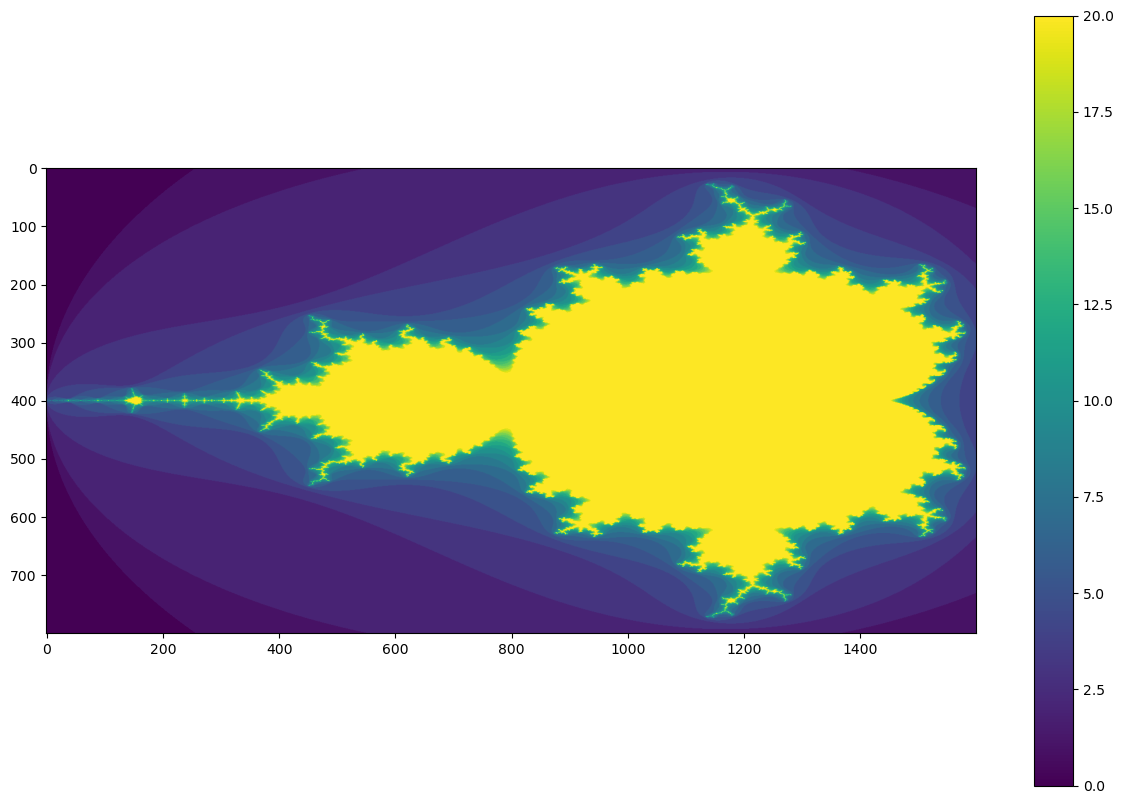

In [6]:
%%time
import matplotlib.pyplot as plt
import numpy as np
### Numpy
def run_numpy(height, width, real_min=-2, real_max=0.5, imag_min=-1.2, imag_max=1.2):
    y, x = np.ogrid[imag_min:imag_max:height*1j, real_min:real_max:width*1j]
    c = x + y*1j

    z = np.zeros(c.shape, dtype=np.complex128)       # initial values of all elements of z are 0
    picture = np.full(c.shape, 20, dtype=np.int64)   # initial values of all pixels are 20

    for i in range(20):
        z = z**2 + c
        picture[(picture == 20) & (abs(z) > 2)] = i
        
    return picture

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

with np.errstate(over="ignore", invalid="ignore"):   # ignore warnings about inf and nan values in z
    im = ax.imshow(run_numpy(800, 1600));
    plt.colorbar(im)

CPU times: user 528 ms, sys: 18.6 ms, total: 547 ms
Wall time: 547 ms


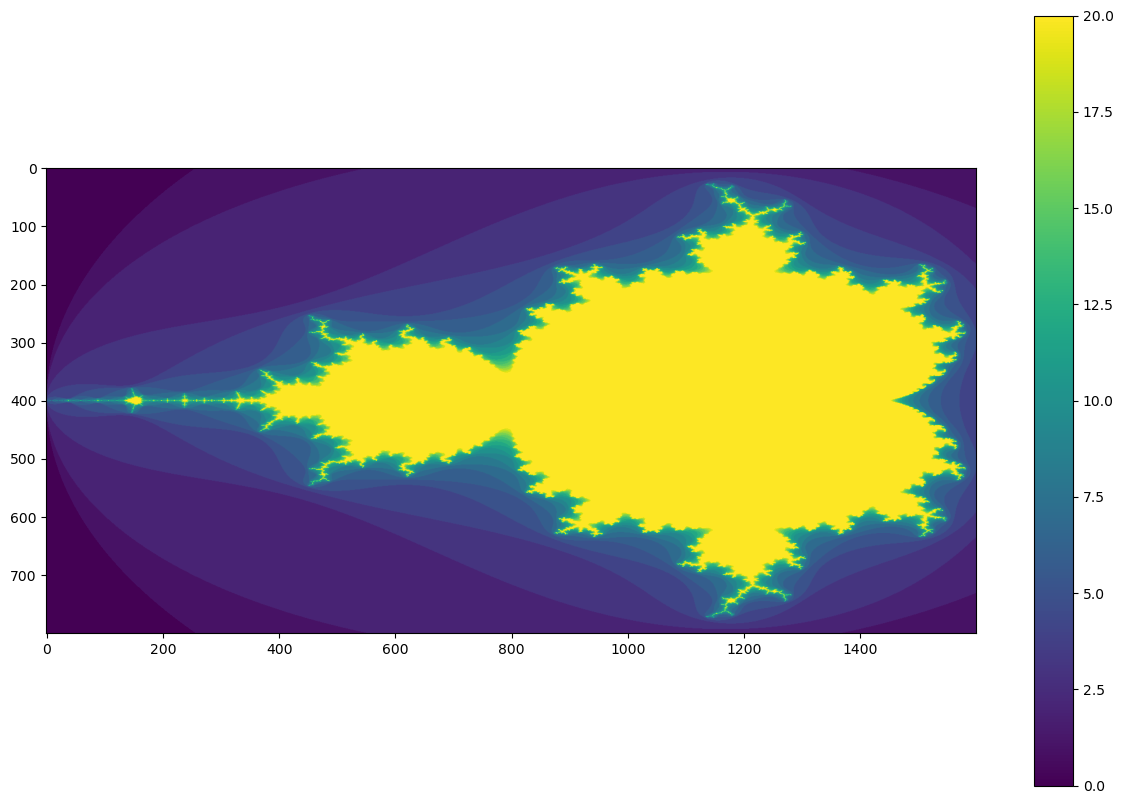

In [5]:
%%time
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
### Awkward
def run_ak(height, width, real_min=-2, real_max=0.5, imag_min=-1.2, imag_max=1.2):
    y, x = np.ogrid[imag_min:imag_max:height*1j, real_min:real_max:width*1j]
    c = x + y*1j
    z = ak.zeros_like(c, dtype=np.complex64)       # initial values of all elements of z are 0
 
    picture = ak.ones_like(c, dtype=np.int8)   # initial values of all pixels
    picture_out = ak.zeros_like(c, dtype = np.int8)
    
    for i in range(20):
        z = z**2 + c
        picture_out = picture_out + ak.fill_none(picture.mask[(abs(z) < 2)], 0)
    
    return picture_out

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

with np.errstate(over="ignore", invalid="ignore"):   # ignore warnings about inf and nan values in z
    im = ax.imshow(run_ak(800, 1600));
    plt.colorbar(im)
    fig.show()